# **Ayudantía 8 - Interpolación**
## Etienne Rojas

Ante cualquier duda o posible corrección, por favor mandar un correo a `etienne.rojas@sansano.usm.cl` 

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Interpolación Baricéntrica

La interpolación baricéntrica es una forma eficiente y estable de calcular el polinomio de interpolación P(x):

Dado un conjunto de puntos $x_0, x_1, \ldots, x_n$ y sus valores correspondientes $y_0, y_1, \ldots, y_n$, el polinomio interpolante se expresa como:

$$
P(x) = \frac{\displaystyle\sum_{j=0}^{n} \frac{w_j}{x - x_j} y_j}{\displaystyle\sum_{j=0}^{n} \frac{w_j}{x - x_j}}
$$

donde los **pesos** $w_j$ son precomputados como:

$$
w_j = \frac{1}{\prod_{\substack{k=0 \\ k \ne j}}^{n} (x_j - x_k)}
$$

Esta forma evita tener que calcular explícitamente los polinomios de Lagrange y mejora la estabilidad numérica.


# **EJRCICIO 1**

Trabajas como investigador en un laboratorio que anliza señales del espacio y crees haber encontrado una señal de un evento astronomico muy importantes, pero lamentablemente parte de la señal se daño y ahora solo cuentas con información parcial para recuperar la señal original.

In [2]:
# PARÁMETROS GENREALES
a, b = -1, 1                      # Intervalo de interpolación
N_func = 1000                    # Número de puntos para graficar la función original
N_interp = 20                    # Número de puntos para la interpolación
N_eval = 1000                    # Número de puntos para evaluar y comparar la interpolación

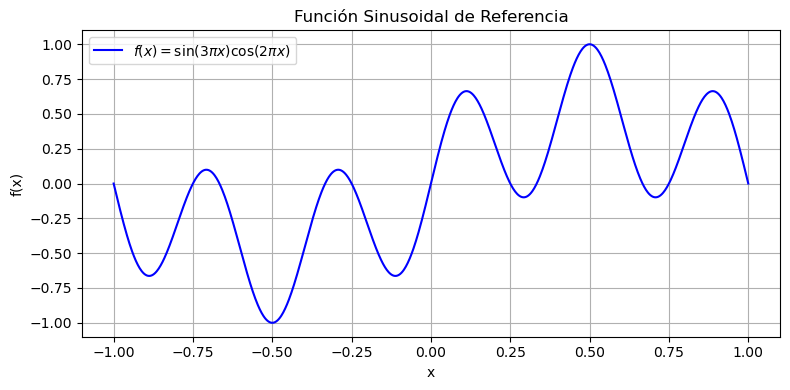

In [3]:
f = lambda x: np.sin(3 * np.pi * x) * np.cos(2 * np.pi * x)

x_func = np.linspace(a, b, N_func)
y_func = f(x_func) 

plt.figure(figsize=(8, 4))
plt.plot(x_func, y_func, label=r'$f(x) = \sin(3\pi x)\cos(2\pi x)$', color='blue')
plt.title("Función Sinusoidal de Referencia")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def barycentric_weights(x_nodes):
    """
    Calcula los pesos para los nodos dados.
    """
    n = len(x_nodes)
    w = np.ones(n)
    #----------------------------------------
    # SU CODIGO AQUÍ









    #----------------------------------------
    return w

def barycentric_interpolator(x_nodes, y_nodes):
    """
    Devuelve una función que evalúa la interpolación baricéntrica
    en cualquier conjunto de puntos x_eval.
    """
    w = barycentric_weights(x_nodes)

    def px(x_eval):
        result = x_eval
        return result

    return px


Utilice sus funciones de interpolación para crear el polinomio de interpolación

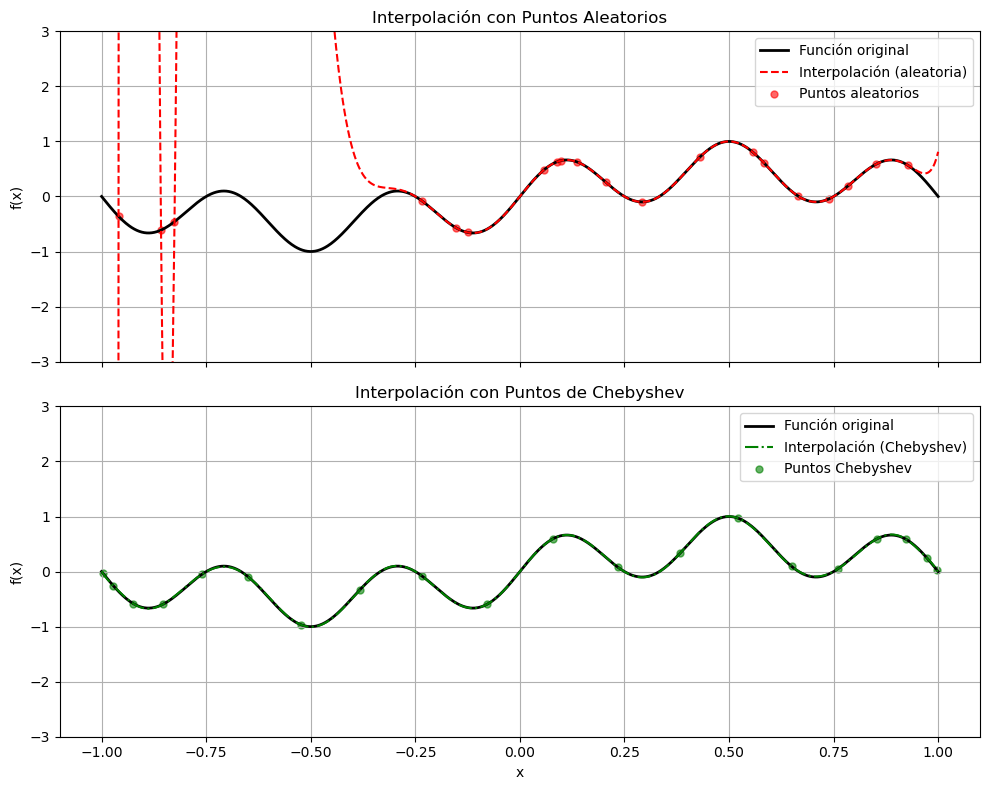

In [ ]:
x_eval = np.linspace(a, b, N_eval)

# Interpolación con puntos aleatorios
# ----------------------------------------
# sU CODIGO AQUÍ
# ----------------------------------------

# Interpolación con puntos de Chebyshev
# ----------------------------------------
# sU CODIGO AQUÍ
# ----------------------------------------



fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Subplot 1: Interpolación aleatoria
axs[0].plot(x_eval, y_func, 'k-', label="Función original", linewidth=2)
axs[0].plot(x_eval, y_rand, 'r--', label="Interpolación (aleatoria)")
axs[0].scatter(x_rand, y_rand, color='red', s=25, label="Puntos aleatorios", alpha=0.6)
axs[0].set_title("Interpolación con Puntos Aleatorios")
axs[0].set_ylabel("f(x)")
axs[0].legend()
axs[0].grid(True)
axs[0].set_ylim(-3, 3)

# Subplot 2: Interpolación Chebyshev
axs[1].plot(x_eval, y_func, 'k-', label="Función original", linewidth=2)
axs[1].plot(x_eval, y_cheb, 'g-.', label="Interpolación (Chebyshev)")
axs[1].scatter(x_cheb, y_cheb, color='green', s=25, label="Puntos Chebyshev", alpha=0.6)
axs[1].set_title("Interpolación con Puntos de Chebyshev")
axs[1].set_xlabel("x")
axs[1].set_ylabel("f(x)")
axs[1].legend()
axs[1].grid(True)
axs[1].set_ylim(-3, 3)

plt.tight_layout()
plt.show()

--- 

# **EJERCICIO 2 Versión Dificil**

Tú cliente, lamentablemente, ha sufrido la pérdida parcial de datos importantes. Su pendrive, que contenía las imágenes más preciadas de su mascota, se ha dañado. Después de varios intentos de recuperación, solo logró obtener una pequeña parte de las imágenes originales, que quedó incompleta y distorsionada. Tu tarea es ayudar a restaurar esas imágenes, utilizando técnicas de interpolación para reconstruir las originales a partir de la información recuperada.

El Cliente solo tiene backup de 1 de las imágenes, así que tiene que utilizar esa imagen para minimizar el error y luego se aplicará la misma técnica que diseñes al resto del dataset.

# **Foto Original**

In [6]:
# PARAMETROS
img = mpimg.imread('../Assets/greyhound2.PNG')
keep_fraction = 0.45

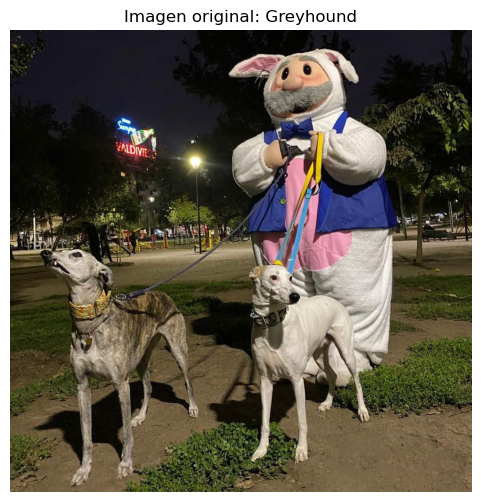

In [7]:
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Imagen original: Greyhound")
plt.show()


---

# **Foto Dañada**

In [8]:
H, W, C = img.shape
num_keep = int(keep_fraction * W)


i = np.arange(1, num_keep + 1)
cheb_norm = 0.5 * (1 - np.cos((2 * i - 1) / (2 * num_keep) * np.pi))
cheb_cols = np.clip((cheb_norm * (W - 1)).astype(int), 0, W - 1)
cheb_cols = np.unique(cheb_cols)

damaged_cheb = np.zeros_like(img)
for c in range(C):
    damaged_cheb[:, cheb_cols, c] = img[:, cheb_cols, c]

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(damaged_cheb)
plt.title(f"Pérdida Chebyshev ({keep_fraction*100:.0f}%)")
plt.axis('off')

plt.tight_layout()
plt.show()

---

# **Foto Restaurada**

In [ ]:
def barycentric_weights(x_nodes):
    """
    Calcula los pesos para los nodos dados.
    """
    n = len(x_nodes)
    w = np.ones(n)
    #----------------------------------------
    # SU CODIGO AQUÍ









    #----------------------------------------
    return w

def barycentric_interpolator(x_nodes, y_nodes):
    """
    Devuelve una función que evalúa la interpolación baricéntrica
    en cualquier conjunto de puntos x_eval.
    """
    w = barycentric_weights(x_nodes)

    def px(x_eval):
        result = x_eval
        return result

    return px


In [10]:
def error_cuadratico_medio(y_real, y_reconstruida):
    return np.mean((y_real - y_reconstruida) ** 2)

Reconstruya la imagen original en utilizando las función `barycentric_interpolator`

In [ ]:
# ----------------------------------------
# CODIO DE RECONSTRUCCION AQUÍ
# ----------------------------------------

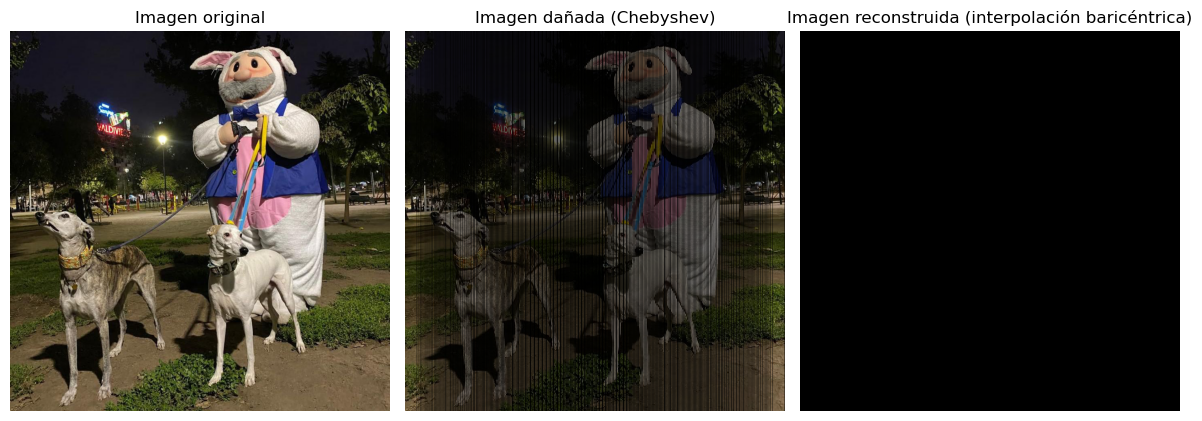

In [ ]:
# --- Mostrar imágenes ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(damaged_cheb)
plt.title("Imagen dañada")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.clip(reconstructed, 0, 255).astype(np.uint8))
plt.title("Imagen reconstruida")
plt.axis('off')

plt.tight_layout()
plt.show()
